# Regression Analysis. Stock Prices, Returns and Volume

Use crsp_monthly.csv file, which contains monthly information on stock prices, bid and ask prices, SP return, etc.
## Load the dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving crsp_monthly.csv to crsp_monthly.csv
User uploaded file "crsp_monthly.csv" with length 134491406 bytes


## View the data

In [ ]:
import pandas as pd
df = pd.read_csv('crsp_monthly.csv')
df

<ipython-input-103-04bcdfeba986>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crsp_monthly.csv')


,PERMNO,date,SICCD,NCUSIP,TICKER,COMNAM,CUSIP,PRC,VOL,BID,ASK,RETX,sprtrn
0,10001,20081231,4920.00,29274A20,EWST,ENERGY WEST INC,36720410,8.26,1292.00,8.30,8.90,0.150418,0.01
1,10001,20090130,4920.00,29274A20,EWST,ENERGY WEST INC,36720410,8.50,695.00,8.39,8.83,0.029298,-0.09
2,10001,20090227,4920.00,29274A20,EWST,ENERGY WEST INC,36720410,8.94,412.00,8.13,9.00,0.051517,-0.11
3,10001,20090331,4920.00,29274A20,EWST,ENERGY WEST INC,36720410,8.18,979.00,7.82,7.98,-0.085011,0.09
4,10001,20090430,4920.00,29274A20,EWST,ENERGY WEST INC,36720410,8.50,828.00,8.50,8.71,0.039120,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177077,93436,20211130,9999.00,88160R10,TSLA,TESLA INC,88160R10,1144.76,6457197.00,1144.56,1144.99,0.027612,-0.01
1177078,93436,20211231,9999.00,88160R10,TSLA,TESLA INC,88160R10,1056.78,5075118.00,1056.89,1057.24,-0.076855,0.04
1177079,93436,20220131,9999.00,88160R10,TSLA,TESLA INC,88160R10,936.72,6361641.00,936.00,936.83,-0.113609,-0.05
1177080,93436,20220228,9999.00,88160R10,TSLA,TESLA INC,88160R10,870.43,4609541.00,870.78,871.14,-0.070768,-0.03


In [ ]:
df.dtypes

PERMNO      int64
date        int64
SICCD      object
NCUSIP     object
TICKER     object
COMNAM     object
CUSIP      object
PRC       float64
VOL       float64
BID       float64
ASK       float64
RETX       object
sprtrn    float64
dtype: object

In [ ]:
# NaN values
df.isna().sum()

PERMNO        0
date          0
SICCD      8077
NCUSIP     8077
TICKER    17708
COMNAM     8077
CUSIP         0
PRC       23997
VOL       18466
BID       24002
ASK       24004
RETX      14366
sprtrn        0
dtype: int64

# Open CRSP file and:
1. Convert date variable to date format

2. Sort dataframe in ascending order by Ticker and date

3. Drop Nan Variables for VOL, BID and ASK variables

4. Keep only positive values of ASK and VOL variables

5. Calculate bid-ask spread as follows: (Ask-Bid)/Ask

6. Provide log transformation of the VOL variable, explain why it is needed, and
provide visualization of log distribution for VOL and spread.

  A smaller ratio means the bid and ask prices are very close, so the stock is easier to trade.

  A larger ratio means the difference between what buyers are willing to pay and what sellers are asking is large, so the stock is harder to trade.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Sort dataframe in ascending order by Ticker and date
df = df.sort_values(['TICKER', 'date'], ascending=[True, True])

# Dropping nan calues
df = df.dropna(subset=['VOL', 'BID', 'ASK'])

# keeping positive values of ASK and VOL variables
df = df[(df['ASK'] > 0) & (df['VOL'] > 0)]

# Calculate bid-ask spread as (Ask-Bid)/Ask
df['spread'] = (df['ASK'] - df['BID']) / df['ASK']

# log transformation of the VOL variable
df['log_VOL'] = np.log(df['VOL']).round(2)

# The log transformation of the VOL variable is needed because this is a Volume variable which has very high values compared to the other columns.
# So, log transformation removes this skewness and heterogeneity between columns of the dataset.
# This is also described below using table.

df

<ipython-input-106-a9a0bf1fe2fa>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spread'] = (df['ASK'] - df['BID']) / df['ASK']
<ipython-input-106-a9a0bf1fe2fa>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_VOL'] = np.log(df['VOL']).round(2)


,PERMNO,date,SICCD,NCUSIP,TICKER,COMNAM,CUSIP,PRC,VOL,BID,ASK,RETX,sprtrn,spread,log_VOL
786953,87432,2008-12-31,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,15.63,1244327.00,15.62,15.64,-0.169942,0.01,0.00,14.03
786954,87432,2009-01-30,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,18.08,1026807.00,18.08,18.16,0.156750,-0.09,0.00,13.84
786955,87432,2009-02-27,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,13.87,857656.00,13.79,13.97,-0.232854,-0.11,0.01,13.66
786956,87432,2009-03-31,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,15.37,876299.00,15.31,15.32,0.108147,0.09,0.00,13.68
786957,87432,2009-04-30,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,18.26,727067.00,18.28,18.29,0.188029,0.09,0.00,13.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982452,91205,2012-10-31,2515,81213930,ZZ,SEALY CORP,81213930,2.23,200178.00,2.22,2.23,0.022936,-0.02,0.00,12.21
982453,91205,2012-11-30,2515,81213930,ZZ,SEALY CORP,81213930,2.17,111189.00,2.17,2.18,-0.026906,0.00,0.00,11.62
982454,91205,2012-12-31,2515,81213930,ZZ,SEALY CORP,81213930,2.17,116706.00,2.16,2.17,0.000000,0.01,0.00,11.67
982455,91205,2013-01-31,2515,81213930,ZZ,SEALY CORP,81213930,2.16,71494.00,2.16,2.17,-0.004608,0.05,0.00,11.18


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df[['VOL','log_VOL']].describe()

,VOL,log_VOL
count,1152279.00,1152279.00
mean,225759.87,10.12
std,1169494.24,2.39
min,1.00,0.00
25%,5498.00,8.61
50%,30287.00,10.32
75%,135062.00,11.81
max,201242689.00,19.12


The log transformation of the VOL variable changed the mean value from 225957.87 to 10.12

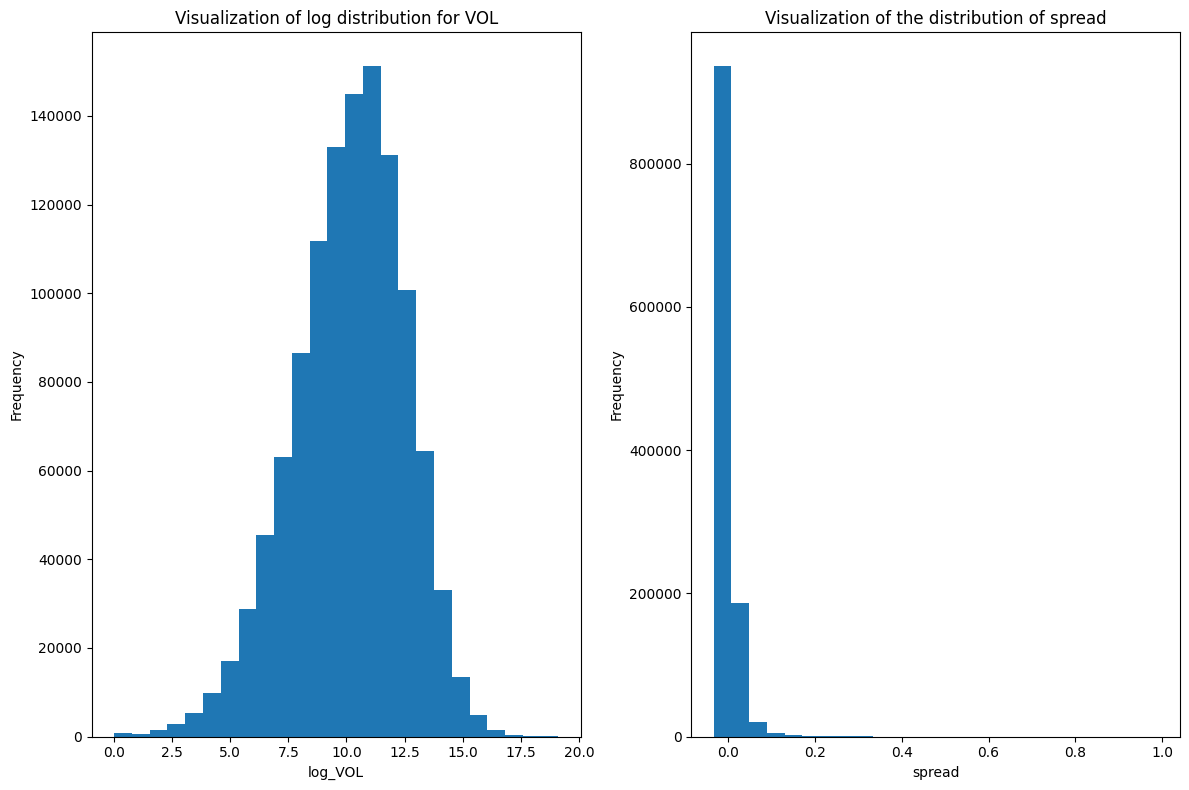

In [ ]:
# Visualization of log distribution for VOL and spread

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.hist(df['log_VOL'], bins=25)
plt.xlabel('log_VOL')
plt.ylabel('Frequency')
plt.title('Visualization of log distribution for VOL')

plt.subplot(1, 2, 2)
plt.hist(df['spread'], bins=25)
plt.xlabel('spread')
plt.ylabel('Frequency')
plt.title('Visualization of the distribution of spread')

plt.tight_layout()
plt.show()

bins=5 →  [0-20), [20-40), [40-60), [60-80), [80-100]

bins=25 → [0-4), [4-8), [8-12), …]

plt.subplot(1, 2, 1) picture left
plt.subplot(1, 2, 2) picture right


#  Winsorize log VOL and bid-ask spread variables at 1 and 99 percentiles

In [ ]:
from scipy.stats.mstats import winsorize
#Winsorization at 1 and 99 percentiles
df['win_log_VOL'] = winsorize(df['log_VOL'], limits=[0.01, 0.01])
df['win_spread'] = winsorize(df['spread'], limits=[0.01, 0.01])
df

,PERMNO,date,SICCD,NCUSIP,TICKER,COMNAM,CUSIP,PRC,VOL,BID,ASK,RETX,sprtrn,spread,log_VOL,win_log_VOL,win_spread
786953,87432,2008-12-31,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,15.63,1244327.00,15.62,15.64,-0.169942,0.01,0.00,14.03,14.03,0.00
786954,87432,2009-01-30,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,18.08,1026807.00,18.08,18.16,0.156750,-0.09,0.00,13.84,13.84,0.00
786955,87432,2009-02-27,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,13.87,857656.00,13.79,13.97,-0.232854,-0.11,0.01,13.66,13.66,0.01
786956,87432,2009-03-31,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,15.37,876299.00,15.31,15.32,0.108147,0.09,0.00,13.68,13.68,0.00
786957,87432,2009-04-30,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,18.26,727067.00,18.28,18.29,0.188029,0.09,0.00,13.50,13.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982452,91205,2012-10-31,2515,81213930,ZZ,SEALY CORP,81213930,2.23,200178.00,2.22,2.23,0.022936,-0.02,0.00,12.21,12.21,0.00
982453,91205,2012-11-30,2515,81213930,ZZ,SEALY CORP,81213930,2.17,111189.00,2.17,2.18,-0.026906,0.00,0.00,11.62,11.62,0.00
982454,91205,2012-12-31,2515,81213930,ZZ,SEALY CORP,81213930,2.17,116706.00,2.16,2.17,0.000000,0.01,0.00,11.67,11.67,0.00
982455,91205,2013-01-31,2515,81213930,ZZ,SEALY CORP,81213930,2.16,71494.00,2.16,2.17,-0.004608,0.05,0.00,11.18,11.18,0.00


In [ ]:
df[['log_VOL','win_log_VOL']].describe()

,log_VOL,win_log_VOL
count,1152279.00,1152279.00
mean,10.12,10.13
std,2.39,2.34
min,0.00,3.87
25%,8.61,8.61
50%,10.32,10.32
75%,11.81,11.81
max,19.12,14.96


In [ ]:
df[['spread','win_spread']].describe()

,spread,win_spread
count,1152279.00,1152279.00
mean,0.01,0.01
std,0.02,0.01
min,-0.03,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,0.00,0.00
max,0.99,0.08


## Scatter Plots

Create two scatter plots:  
1. log-transformed volume vs. bid-ask spread  
2. Winsorized log volume vs. Winsorized bid-ask spread  

Use `seaborn` and/or `matplotlib` to visualize. Observe and describe the relationship between the variables, and compare any differences between the original and Winsorized plots.


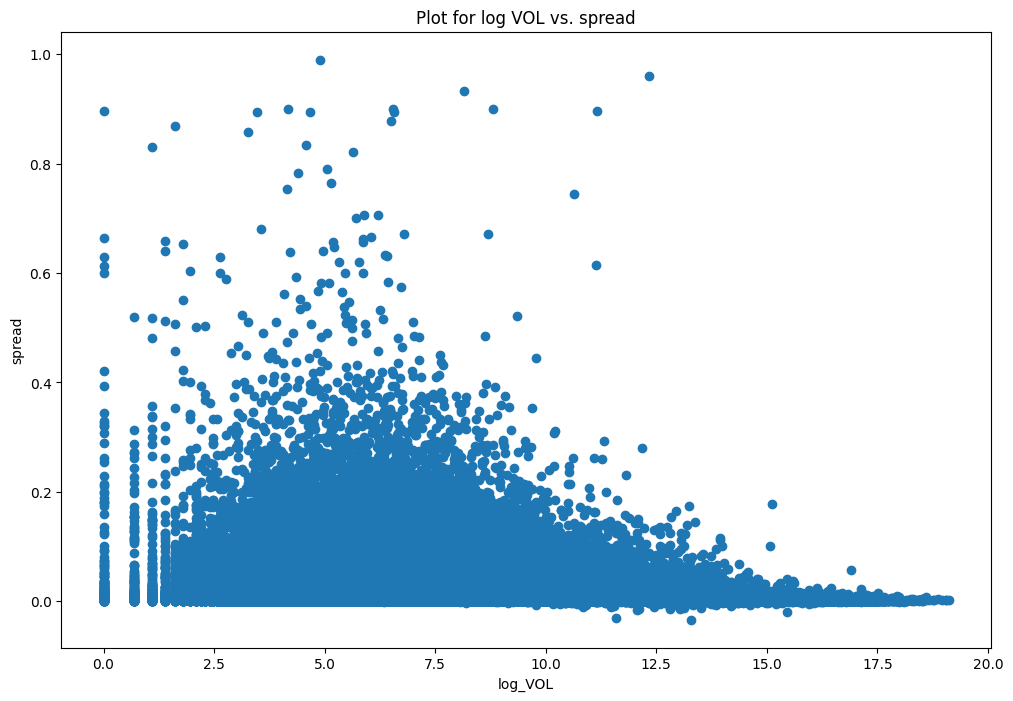

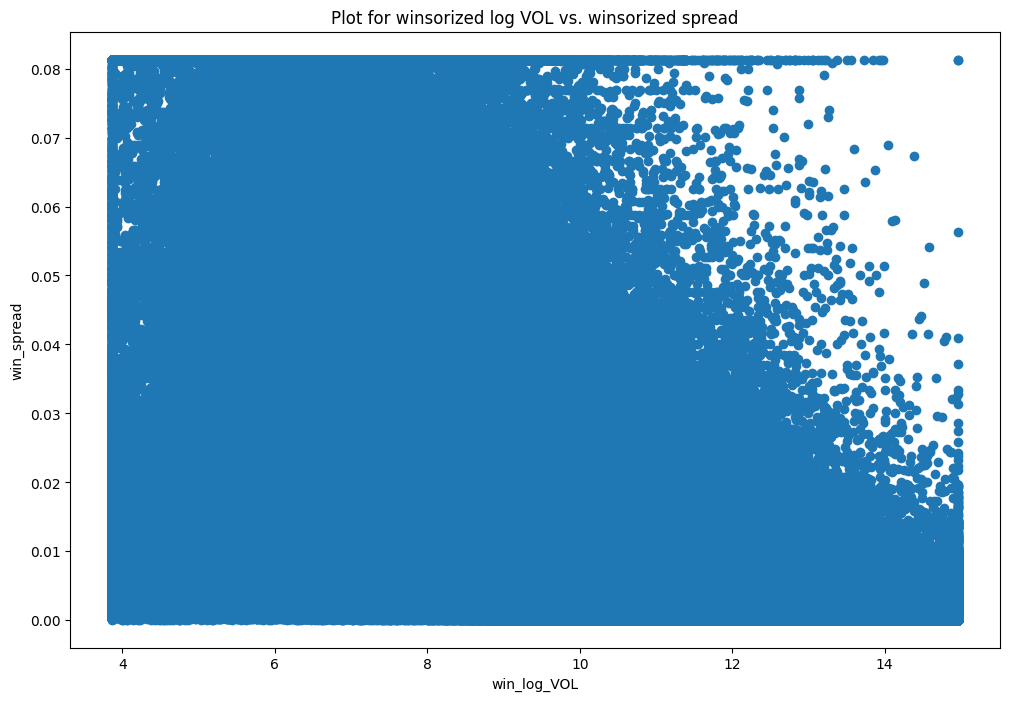

In [ ]:
# first scatter plot for log volume and bid-ask spread
plt.figure(figsize=(12, 8))
plt.scatter(df['log_VOL'], df['spread'])
plt.xlabel('log_VOL')
plt.ylabel('spread')
plt.title('Plot for log VOL vs. spread')
plt.show()

# second scatter plot for winsorized log volume and winsorized bid-ask spread
plt.figure(figsize=(12, 8))
plt.scatter(df['win_log_VOL'], df['win_spread'])
plt.xlabel('win_log_VOL')
plt.ylabel('win_spread')
plt.title('Plot for winsorized log VOL vs. winsorized spread')
plt.show()

The relationship between log volume and bid-ask spread is a non-linear relationship. The graph shows the points are scattered without any clear linear relationship.
It agrees with the theory that Stocks with higher trading volumes will typically have lower bid-ask spread.


The relationship between winsorised log volume and winsorized bid-ask spread is a non-linear relationship. The graph shows the points are scattered without any clear linear relationship.


The difference between the two plots is that the winsorised log volume vs winsorized bid-ask spread, has less number of outliers and the data is more evenly distributed for both winsorised log volume and winsorized bid-ask spread values.

# Run a univariate regression. We want to see the effect of log trading volume on bid-ask spread

In [ ]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

# Define X and Y variables
X = df['win_log_VOL']
Y = df['win_spread']

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
# add constant
print_model = model.summary()
print(print_model);

                            OLS Regression Results                            
Dep. Variable:             win_spread   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                 2.044e+05
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:06:45   Log-Likelihood:             3.4851e+06
No. Observations:             1152279   AIC:                        -6.970e+06
Df Residuals:                 1152277   BIC:                        -6.970e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0275   4.86e-05    565.361      

___
# Interpret the results: coefficient signs, magnitude, significance, R-squared. What are the main conclusions about regression results?

The coefficient for variable win_log_VOL in the regression output is -0.0021. It is negative, which means that an increase in log trading volume is associated with a decrease in the bid-ask spread.



Interpretion:

As the value of win_log_VOL increases by 1 unit, the value of win_spread decreases by 0.0021 unit.

P-value - probability value, is a number describing how likely it is that your
data would have occurred by random chance. Shows significance of
coefficient. The p-value for variable win_log_VOL in the regression output is 0.00. Since it is less than 0.05, the coefficient is statistically significant.


R-squared or coefficient of determination shows the percentage of
variation explained by the model. The better the model fits the data, the higher the R-squared. So, R-squared will show how close the data is to the fitted line. The R-squared value as seen from the regression output is 0.15. This means this univariate regression model is not a good fit to the actual data. That's why we should do the multivariate regression.

The results are inline with my expectations, the coefficient sign was expected to be negative. The R-Square was expected to be low.

___
# Extension of the Regression Analysis  

Think about which additional variables could be included in the regression model:  
- Select **two variables from company fundamentals** and explain why they are relevant.  
- Select **one to two variables from textual analysis** (e.g., sentiment or readability of company reports) and explain why they might affect the bid-ask spread.  

Also, discuss the **expected signs of the coefficients** for these variables (positive or negative) and provide justification.  

The bid-ask spread is determined by the supply and demand.

Stocks with higher trading volumes will typically have lower bid-ask spread. Stocks with lower prices (new, traded less) will typically have higher bid-ask spread. Stocks with higher volatility will have higher bid-ask spread.

The additional 2 variables from company fundamentals can be:

- Return on Equity (ROE): Return on Equity are likely to determine the bid-ask spread. Stock with higher Return on Equity is likely to be traded more and with less spread. Hence, the expected coefficient is negative.


- Market-to-Book Ratio: We can add it because the variable Market-to-Book Ratio measures the difference between market and book value of a company. M/B ratio > 1 Stock is overvalued. M/B ratio < 1 Stock is undervalued.
Stock with lower value of Market-to-Book Ratio is likely to be traded with smaller bid-ask spread since usually the under-valued stocks are traded with smaller volatility. So, the the expected coefficient is positive.

The additional variables based on textual analysis can be:

- Polarity: It is the position on a scale between positive and negative. It is determined by the sentimental analysis. In a simplistic example of sentiment analysis, text would be classified as positive, negative, or neutral based on how many words or phrases within that text are classified as positive, negative or neutral. The polarity classification system typically takes into account a measure of how strongly positive or negative the words or phrases are.

For example, a scale may be used with +1 being the most positive,
-1 being the most negative, and 0 being neutral.

The expected sign is negative since a lower value of polarity is likely to introduce volatility in the stock, which further increases bid-ask spread.
___

#  Calculate stock return by Ticker using lambda function

Explaination:

x.shift(1):
Shifts the data down by one row, so it represents the previous period’s value.

df.groupby("TICKER")['PRC']:
Groups the dataset by stock ticker (TICKER), meaning the calculation is done separately for each stock’s price series.

.apply(change):
Applies the change function to each group’s PRC (price) values.

Result:
The computed returns are stored in a new column df["stock_ret"], which represents the monthly returns for each stock.

In [ ]:
change = lambda x: (x - x.shift(1))/x.shift(1)

df["stock_ret"] = df.groupby("TICKER")['PRC'].apply(change)
df

<ipython-input-115-4bb0e09aeb58>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["stock_ret"] = df.groupby("TICKER")['PRC'].apply(change)


,PERMNO,date,SICCD,NCUSIP,TICKER,COMNAM,CUSIP,PRC,VOL,BID,ASK,RETX,sprtrn,spread,log_VOL,win_log_VOL,win_spread,stock_ret
786953,87432,2008-12-31,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,15.63,1244327.00,15.62,15.64,-0.169942,0.01,0.00,14.03,14.03,0.00,NaN
786954,87432,2009-01-30,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,18.08,1026807.00,18.08,18.16,0.156750,-0.09,0.00,13.84,13.84,0.00,0.16
786955,87432,2009-02-27,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,13.87,857656.00,13.79,13.97,-0.232854,-0.11,0.01,13.66,13.66,0.01,-0.23
786956,87432,2009-03-31,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,15.37,876299.00,15.31,15.32,0.108147,0.09,0.00,13.68,13.68,0.00,0.11
786957,87432,2009-04-30,3825.00,00846U10,A,AGILENT TECHNOLOGIES INC,00846U10,18.26,727067.00,18.28,18.29,0.188029,0.09,0.00,13.50,13.50,0.00,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982452,91205,2012-10-31,2515,81213930,ZZ,SEALY CORP,81213930,2.23,200178.00,2.22,2.23,0.022936,-0.02,0.00,12.21,12.21,0.00,0.02
982453,91205,2012-11-30,2515,81213930,ZZ,SEALY CORP,81213930,2.17,111189.00,2.17,2.18,-0.026906,0.00,0.00,11.62,11.62,0.00,-0.03
982454,91205,2012-12-31,2515,81213930,ZZ,SEALY CORP,81213930,2.17,116706.00,2.16,2.17,0.000000,0.01,0.00,11.67,11.67,0.00,0.00
982455,91205,2013-01-31,2515,81213930,ZZ,SEALY CORP,81213930,2.16,71494.00,2.16,2.17,-0.004608,0.05,0.00,11.18,11.18,0.00,-0.00


# Part 2 CAPM.

## Choose any 2 companies.

INTC - Intel

NVDA - Nvidia
___

## Get Betas for these companies from Yahoo Finance website. Discuss the betas for each company.

Yahoo Finance website:

NVIDIA: Beta (5Y Monthly) = 1.77

INTEL: Beta (5Y Monthly)	0.87

The beta of NVIDIA is 1.77 which is more than 1. It menas that the stock is more volatile than the benchmark market index whose beta is considered to be 1. Such stock increases the risk of the investor's portfolio since the fluctuations are significant.

The beta of INTEL is 0.87 which is less than 1. It menas that the stock is less volatile than the benchmark market index whose beta is considered to be 1. Such stock decreases the risk of the investor's portfolio since the fluctuations are smaller.
___

## Use S&P500 average stock return and risk-free rate

The average numbers for past 5 years (2017-2021): S&P500 annual return, which is equal = 17.04%

Risk-free rate = 0.01%
___

### For a period from 2018 to 2022 calculate the annual stock returns for these companies and take the average. To calculate the annual stock return as follows: (EndOfYear stock price - BeginningOfYear stock price)/BeginningOfYear stock price.

In [ ]:
capm_df = df[df['TICKER'].isin(['INTC', 'NVDA'])]
capm_df.head()

,PERMNO,date,SICCD,NCUSIP,TICKER,COMNAM,CUSIP,PRC,VOL,BID,ASK,RETX,sprtrn,spread,log_VOL,win_log_VOL,win_spread,stock_ret
489618,59328,2008-12-31,3679,45814010,INTC,INTEL CORP,45814010,14.66,13273057.00,14.67,14.68,0.062319,0.01,0.00,16.40,14.96,0.00,NaN
489619,59328,2009-01-30,3679,45814010,INTC,INTEL CORP,45814010,12.90,12684529.00,12.90,12.91,-0.120055,-0.09,0.00,16.36,14.96,0.00,-0.12
489620,59328,2009-02-27,3679,45814010,INTC,INTEL CORP,45814010,12.74,13342640.00,12.75,12.76,-0.012403,-0.11,0.00,16.41,14.96,0.00,-0.01
489621,59328,2009-03-31,3679,45814010,INTC,INTEL CORP,45814010,15.03,16425898.00,15.03,15.04,0.179749,0.09,0.00,16.61,14.96,0.00,0.18
489622,59328,2009-04-30,3679,45814010,INTC,INTEL CORP,45814010,15.78,15148896.00,15.74,15.79,0.049900,0.09,0.00,16.53,14.96,0.00,0.05


Only ticker is INTC and NVDA will stay in the dataframe

In [ ]:
capm_df = capm_df[(capm_df['date'].dt.year >= 2018) & (capm_df['date'].dt.year <= 2022)]
capm_df.head()


,PERMNO,date,SICCD,NCUSIP,TICKER,COMNAM,CUSIP,PRC,VOL,BID,ASK,RETX,sprtrn,spread,log_VOL,win_log_VOL,win_spread,stock_ret
489727,59328,2018-01-31,3679,45814010,INTC,INTEL CORP,45814010,48.14,9121173.00,48.15,48.16,0.042894,0.06,0.00,16.03,14.96,0.00,0.04
489728,59328,2018-02-28,3679,45814010,INTC,INTEL CORP,45814010,49.29,6087654.00,49.29,49.30,0.023889,-0.04,0.00,15.62,14.96,0.00,0.02
489729,59328,2018-03-29,3679,45814010,INTC,INTEL CORP,45814010,52.08,7108681.00,51.79,51.82,0.056604,-0.03,0.00,15.78,14.96,0.00,0.06
489730,59328,2018-04-30,3679,45814010,INTC,INTEL CORP,45814010,51.62,6664027.00,51.62,51.63,-0.008833,0.00,0.00,15.71,14.96,0.00,-0.01
489731,59328,2018-05-31,3679,45814010,INTC,INTEL CORP,45814010,55.20,4853314.00,55.21,55.22,0.069353,0.02,0.00,15.40,14.96,0.00,0.07


`capm_df['date'].dt.year`：Extracts the year from the `date` column.  
  - Example: `2020-05-31` → `2020`

Keeps only the stock data between 2018 and 2022.

In [ ]:
# Calculate year-wise annual returns for each ticker
annual_ret = lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]
annual_returns = capm_df.groupby(['TICKER', capm_df['date'].dt.year])['PRC'].apply(annual_ret)
annual_returns

TICKER  date
INTC    2018   -0.03
        2019    0.27
        2020   -0.22
        2021   -0.07
        2022    0.02
NVDA    2018   -0.46
        2019    0.64
        2020    1.21
        2021   -0.43
        2022    0.11
Name: PRC, dtype: float64

`x.iloc[-1]` = last price of the year  
`x.iloc[0]` = first price of the year  
`(x.iloc[-1] - x.iloc[0]) / x.iloc[0]` = annual return


In [ ]:
# Calculate the average annual return for each of the two companies (ticker)
annual_returns.groupby('TICKER').mean()

TICKER
INTC   -0.01
NVDA    0.21
Name: PRC, dtype: float64

Calculate the mean of annual returns across all years for each stock  
Result: the average annual return for each company

# Use CAPM model and find out if stock is undervalued or overvalued.

## Rename the column

In [ ]:
capm_df=capm_df.rename(columns={'sprtrn':'mkt','RETX':'return'})
capm_df.head()

,PERMNO,date,SICCD,NCUSIP,TICKER,COMNAM,CUSIP,PRC,VOL,BID,ASK,return,mkt,spread,log_VOL,win_log_VOL,win_spread,stock_ret
489727,59328,2018-01-31,3679,45814010,INTC,INTEL CORP,45814010,48.14,9121173.00,48.15,48.16,0.042894,0.06,0.00,16.03,14.96,0.00,0.04
489728,59328,2018-02-28,3679,45814010,INTC,INTEL CORP,45814010,49.29,6087654.00,49.29,49.30,0.023889,-0.04,0.00,15.62,14.96,0.00,0.02
489729,59328,2018-03-29,3679,45814010,INTC,INTEL CORP,45814010,52.08,7108681.00,51.79,51.82,0.056604,-0.03,0.00,15.78,14.96,0.00,0.06
489730,59328,2018-04-30,3679,45814010,INTC,INTEL CORP,45814010,51.62,6664027.00,51.62,51.63,-0.008833,0.00,0.00,15.71,14.96,0.00,-0.01
489731,59328,2018-05-31,3679,45814010,INTC,INTEL CORP,45814010,55.20,4853314.00,55.21,55.22,0.069353,0.02,0.00,15.40,14.96,0.00,0.07


In [ ]:
#The risk free rate is always around 0.01
#I create a column with this value
capm_df['risk_free'] = 0.01
capm_df.head()

,PERMNO,date,SICCD,NCUSIP,TICKER,COMNAM,CUSIP,PRC,VOL,BID,ASK,return,mkt,spread,log_VOL,win_log_VOL,win_spread,stock_ret,risk_free
489727,59328,2018-01-31,3679,45814010,INTC,INTEL CORP,45814010,48.14,9121173.00,48.15,48.16,0.042894,0.06,0.00,16.03,14.96,0.00,0.04,0.01
489728,59328,2018-02-28,3679,45814010,INTC,INTEL CORP,45814010,49.29,6087654.00,49.29,49.30,0.023889,-0.04,0.00,15.62,14.96,0.00,0.02,0.01
489729,59328,2018-03-29,3679,45814010,INTC,INTEL CORP,45814010,52.08,7108681.00,51.79,51.82,0.056604,-0.03,0.00,15.78,14.96,0.00,0.06,0.01
489730,59328,2018-04-30,3679,45814010,INTC,INTEL CORP,45814010,51.62,6664027.00,51.62,51.63,-0.008833,0.00,0.00,15.71,14.96,0.00,-0.01,0.01
489731,59328,2018-05-31,3679,45814010,INTC,INTEL CORP,45814010,55.20,4853314.00,55.21,55.22,0.069353,0.02,0.00,15.40,14.96,0.00,0.07,0.01


In [ ]:
capm_df.dtypes

PERMNO                  int64
date           datetime64[ns]
SICCD                  object
NCUSIP                 object
TICKER                 object
COMNAM                 object
CUSIP                  object
PRC                   float64
VOL                   float64
BID                   float64
ASK                   float64
return                 object
mkt                   float64
spread                float64
log_VOL               float64
win_log_VOL           float64
win_spread            float64
stock_ret             float64
risk_free             float64
dtype: object

`errors='coerce'` converts any non-numeric or invalid value to NaN

In [ ]:
capm_df['return'] = pd.to_numeric(capm_df['return'], errors='coerce')

In [ ]:
# Calculation of market premium and Stock Return - Risk free return
capm_df['mkt_rf'] = capm_df['mkt'] - capm_df['risk_free']
capm_df['ret-rf'] = capm_df['return'] - capm_df['risk_free']
capm_df.head()

,PERMNO,date,SICCD,NCUSIP,TICKER,COMNAM,CUSIP,PRC,VOL,BID,...,return,mkt,spread,log_VOL,win_log_VOL,win_spread,stock_ret,risk_free,mkt_rf,ret-rf
489727,59328,2018-01-31,3679,45814010,INTC,INTEL CORP,45814010,48.14,9121173.00,48.15,...,0.04,0.06,0.00,16.03,14.96,0.00,0.04,0.01,0.05,0.03
489728,59328,2018-02-28,3679,45814010,INTC,INTEL CORP,45814010,49.29,6087654.00,49.29,...,0.02,-0.04,0.00,15.62,14.96,0.00,0.02,0.01,-0.05,0.01
489729,59328,2018-03-29,3679,45814010,INTC,INTEL CORP,45814010,52.08,7108681.00,51.79,...,0.06,-0.03,0.00,15.78,14.96,0.00,0.06,0.01,-0.04,0.05
489730,59328,2018-04-30,3679,45814010,INTC,INTEL CORP,45814010,51.62,6664027.00,51.62,...,-0.01,0.00,0.00,15.71,14.96,0.00,-0.01,0.01,-0.01,-0.02
489731,59328,2018-05-31,3679,45814010,INTC,INTEL CORP,45814010,55.20,4853314.00,55.21,...,0.07,0.02,0.00,15.40,14.96,0.00,0.07,0.01,0.01,0.06


## CAPM Scatter plot for INTEL: MKT-Rf vs Ret-Rf

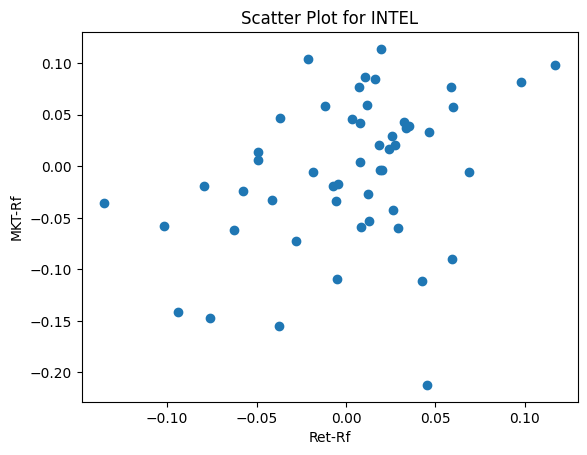

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

intc = capm_df[capm_df['TICKER'] == 'INTC']

X = intc['mkt_rf']
Y = intc['ret-rf']

import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.title("Scatter Plot for INTEL")
plt.xlabel("Ret-Rf")
plt.ylabel("MKT-Rf")
plt.show()

## CAPM Scatter plot for NVIDIA: MKT-Rf vs Ret-Rf

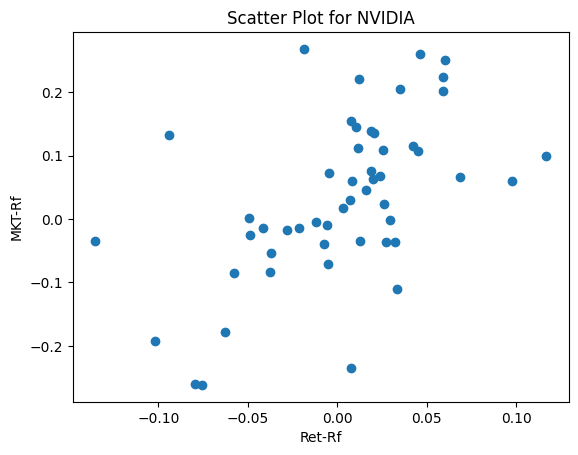

In [ ]:
nvda = capm_df[capm_df['TICKER'] == 'NVDA']

X = nvda['mkt_rf']
Y = nvda['ret-rf']

plt.scatter(X, Y)
plt.title("Scatter Plot for NVIDIA")
plt.xlabel("Ret-Rf")
plt.ylabel("MKT-Rf")
plt.show()

## CAPM Regression for INTEL

In [ ]:
import statsmodels.api as sm

X = intc['mkt_rf']
Y = intc['ret-rf']

X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model);

                            OLS Regression Results                            
Dep. Variable:                 ret-rf   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     7.195
Date:                Sun, 11 Jun 2023   Prob (F-statistic):            0.00994
Time:                        12:08:38   Log-Likelihood:                 65.494
No. Observations:                  51   AIC:                            -127.0
Df Residuals:                      49   BIC:                            -123.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0068      0.010     -0.708      0.4

## CAPM Regression for NVIDIA

In [ ]:
X = nvda['mkt_rf']
Y = nvda['ret-rf']

X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model);

                            OLS Regression Results                            
Dep. Variable:                 ret-rf   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     20.76
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           3.47e-05
Time:                        12:08:40   Log-Likelihood:                 41.801
No. Observations:                  51   AIC:                            -79.60
Df Residuals:                      49   BIC:                            -75.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0304      0.015      1.992      0.0

Beta of mkt_rf：

The beta of Intel using CRSP Monthly 2018-2022 data from regression output is 0.525

The beta of Nvidia using CRSP Monthly 2018-2022 data from regression output is 1.42

This differs from the Yahoo Finance because of the slight difference in the data used. Here, we used data from 2018 to 2022.
___

INTEL:

We can now calculate expected return based on this data:

𝑬(𝑹𝒊) = 𝑹𝒇 + 𝜷𝒊 𝑬(𝑹𝑴𝑲𝑻) − 𝑹𝒇

E(R_INTL) = 0.01 + 0.525*(17.04 - 0.01) = 8.95%

Actual average for Intel is -1.00%

Conclusion: Intel is overvalued stock, it under-performs expectations.

NVIDIA:

We can now calculate expected return based on this data:

𝑬(𝑹𝒊) = 𝑹𝒇 + 𝜷𝒊 𝑬(𝑹𝑴𝑲𝑻) − 𝑹𝒇

E(R_NVIDIA) = 0.01 + 1.42*(17.04 - 0.01) = 24.19%

Actual average for NVIDIA is 21.00%

Conclusion: NVIDIA is overvalued stock, it under-performs expectations.